In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline


In [35]:
from sklearn.datasets import load_breast_cancer

In [36]:
#loading the dataset 
cancer = load_breast_cancer()


In [37]:
cancer.keys() #looking at features of the data set 

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [38]:
#print(cancer["DESCR"]) #looking at the data 

In [39]:
#loading the data into a dataframe 
df = pd.DataFrame(cancer["data"], columns = cancer["feature_names"])

In [40]:
df.head()# printing first 5 rows of the data frame 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
#preprocessing data, as we notice some features have different scales, to be able to fit the algorithm, we have to scale data to the same scale
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(df)
scaled_data = scaler.transform(df)

In [42]:
from sklearn.decomposition import PCA # importing needed library 
pca = PCA(n_components = 2) # number of components 
pca.fit(scaled_data)

PCA(n_components=2)

In [43]:
#looking at the difference in data after applying PCA
new_data = pca.transform(scaled_data)
print(scaled_data.shape)
print(new_data.shape)# we can see that we have reduced from 30 to 2 features 

(569, 30)
(569, 2)


Text(0, 0.5, 'Second Principal Component')

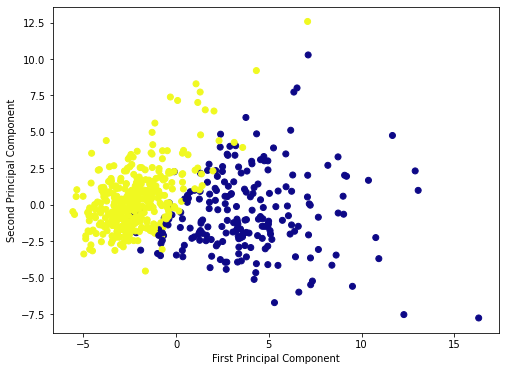

In [53]:
#lets plot the components 
plt.figure(figsize = (8,6))
plt.scatter(new_data[:,0],new_data[:,1], c = cancer["target"], cmap= "plasma" )
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
#we can clearly see our data separation( the target variable was malignant or benign)

<AxesSubplot:>

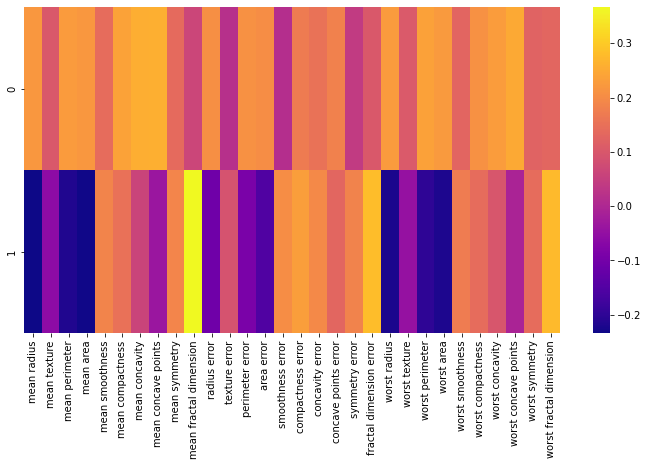

In [58]:
#lets plot data in a heatmap
df_components = pd.DataFrame(pca.components_, columns = cancer["feature_names"])
plt.figure(figsize = (12,6))
sns.heatmap(df_components,cmap = "plasma")
#color bars represent the correlation between features and the components